In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [2]:
wine = pd.read_csv(r"C:\Users\Meiyappan\Desktop\DS_DATASETS\wine_dataset.csv")

wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


In [3]:
wine.shape

(178, 14)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

In [5]:
wine.describe(include='all')

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,NaN
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,NaN
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,NaN
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,NaN
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,NaN
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,NaN


In [6]:
scale = StandardScaler()

wine.iloc[:, 0:13] = scale.fit_transform(wine.iloc[:, 0:13])

In [7]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,One
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,One
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,One
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,One
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,One


In [8]:
label = LabelEncoder()

wine['Wine Type'] = label.fit_transform(wine['Wine Type'])

In [10]:
corr = wine.corr()

<AxesSubplot:>

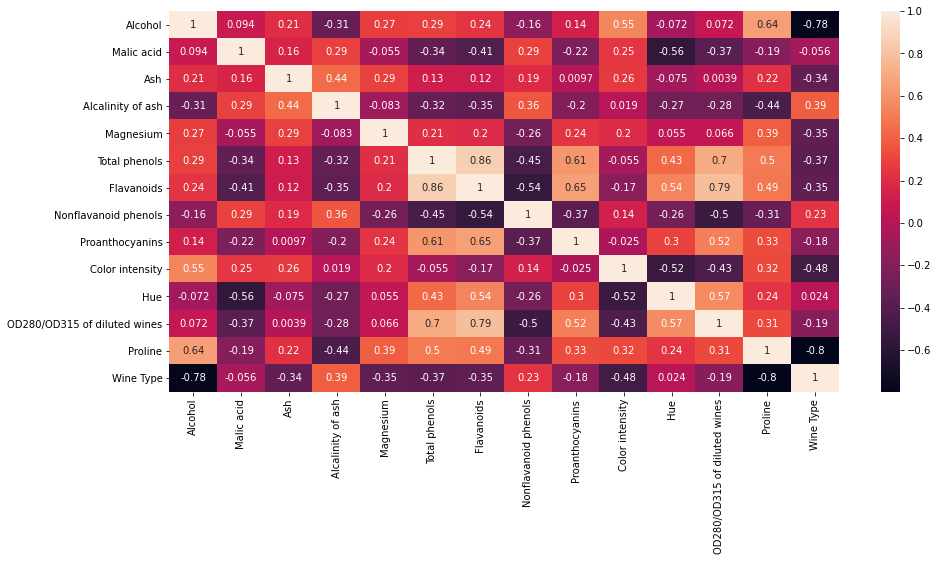

In [12]:
plt.figure(figsize=(15, 7))

sns.heatmap(corr, annot=True, fmt='.2g')

In [13]:
x = wine.drop(['Wine Type'], axis=1)

y = wine['Wine Type']

In [14]:
report = sm.OLS(y, x).fit()

report.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Wine Type   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.267
Method:                 Least Squares   F-statistic:                              5.980
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                    4.85e-09
Time:                        10:41:01   Log-Likelihood:                         -273.69
No. Observations:                 178   AIC:                                      573.4
Df Residuals:                     165   BIC:                                      614.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Alcohol                         -0.2529      0.137     -1.839      0.068      -0.524       0.019
Malic acid                      -0.0839      0.113     -0.744      0.458      -0.307       0.139
Ash                             -0.2081      0.130     -1.606      0.110      -0.464       0.048
Alcalinity of ash                0.2069      0.131      1.578      0.117      -0.052       0.466
Magnesium                       -0.0014      0.104     -0.013      0.989      -0.207       0.205
Total phenols                    0.0491      0.183      0.269      0.788      -0.311       0.409
Flavanoids                      -0.0337      0.232     -0.145      0.885      -0.493       0.425
Nonflavanoid phenols             0.0415      0.117      0.353      0.725      -0.191       0.273
Proanthocyanins                  0.0623      0.123      0.506      0.614      -0.181       0.306
Color intensity                 -0.0883      0.152     -0.579      0.563      -0.389       0.213
Hue                              0.0853      0.140      0.609      0.543      -0.191       0.362
OD280/OD315 of diluted wines    -0.1023      0.171     -0.600      0.549      -0.439       0.234
Proline                         -0.3689      0.147     -2.504      0.013      -0.660      -0.078
==============================================================================
Omnibus:                        2.185   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.139
Skew:                          -0.204   Prob(JB):                        0.343
Kurtosis:                       2.650   Cond. No.                         6.75
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
def vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF score'] = [variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
    return vif

vif(x)

,Features,VIF score
0,Alcohol,2.460372
1,Malic acid,1.656647
2,Ash,2.185448
3,Alcalinity of ash,2.238732
4,Magnesium,1.417855
5,Total phenols,4.334519
6,Flavanoids,7.029350
7,Nonflavanoid phenols,1.796380
8,Proanthocyanins,1.975683
9,Color intensity,3.026304


In [51]:
x = wine[['Alcohol', 'Proline']]

# x = wine.drop(['Wine Type', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols'], axis=1)

y = wine['Wine Type']

In [52]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [53]:
y_train.value_counts()

2    56
0    51
1    35
Name: Wine Type, dtype: int64

In [54]:
smote = SMOTE(sampling_strategy='minority', random_state=100)

x_train, y_train = smote.fit_sample(x_train, y_train)

In [55]:
y_train.value_counts()

2    56
1    56
0    51
Name: Wine Type, dtype: int64

In [69]:
Logistic = LogisticRegression()

Logistic.fit(x_train, y_train)

LogisticRegression()

In [70]:
Logistic.score(x_test, y_test)

0.8611111111111112

In [71]:
print(metrics.classification_report(y_test, Logistic.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.77      0.80        13
           2       0.82      0.93      0.87        15

    accuracy                           0.86        36
   macro avg       0.89      0.86      0.87        36
weighted avg       0.87      0.86      0.86        36



In [72]:
metrics.log_loss(y_test, Logistic.predict_proba(x_test))

0.3612502150573752